In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_train_MVMD.mat'
testpath = '../datasets/GpositivePseAAC/Gram_positivePseAAC519_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 208/208 [00:00<00:00, 7164.04it/s]

Train data shape:  (311, 1, 300)
Train labels shape:  (311, 4)
Test data shape:  (208, 1, 300)
Test labels shape:  (208, 4)


## SNN

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 4
Class 1, class 1 neurons = 2, class 0 neurons = 2
Class 2, class 1 neurons = 3, class 0 neurons = 11
Class 3, class 1 neurons = 6, class 0 neurons = 5


 25%|██▌       | 500/2000 [36:25<1:48:59,  4.36s/it]

Epoch number: 500
Train Precision: 0.8894, Test Precision: 0.8319
Train Recall: 0.5637, Test Recall: 0.4498
Train F1: 0.6901, Test F1: 0.5839
Max. train classwise accuracy for is 0.9678
Min. train classwise accuracy for is 0.7910
Max. test classwise accuracy for is 0.9663
Min. test classwise accuracy for is 0.7692


 50%|█████     | 1000/2000 [1:12:37<1:12:03,  4.32s/it]

Epoch number: 1000
Train Precision: 0.9084, Test Precision: 0.7632
Train Recall: 0.7261, Test Recall: 0.5550
Train F1: 0.8071, Test F1: 0.6427
Max. train classwise accuracy for is 0.9678
Min. train classwise accuracy for is 0.8810
Max. test classwise accuracy for is 0.9663
Min. test classwise accuracy for is 0.7837


 75%|███████▌  | 1500/2000 [1:48:30<35:50,  4.30s/it]  

Epoch number: 1500
Train Precision: 0.9138, Test Precision: 0.6791
Train Recall: 0.8439, Test Recall: 0.6077
Train F1: 0.8775, Test F1: 0.6414
Max. train classwise accuracy for is 0.9711
Min. train classwise accuracy for is 0.9164
Max. test classwise accuracy for is 0.9663
Min. test classwise accuracy for is 0.7452


100%|██████████| 2000/2000 [2:28:35<00:00,  4.46s/it]

Epoch number: 2000
Train Precision: 0.9130, Test Precision: 0.6631
Train Recall: 0.8694, Test Recall: 0.5933
Train F1: 0.8907, Test F1: 0.6263
Max. train classwise accuracy for is 0.9807
Min. train classwise accuracy for is 0.9293
Max. test classwise accuracy for is 0.9663
Min. test classwise accuracy for is 0.7356
Max. Test Precision: 1.0000 at epoch 120
Test Recall at max. test precision: 0.0048
Test F1 at max. test precision: 0.0095
Train Precision at max. test precision: 1.0000
Train Recall at max. test precision: 0.0350
Train F1 at max. test precision: 0.0677
Max. Test Recall: 0.6268 at epoch 1522
Test Precision at max. test recall: 0.6823
Test F1 at max. test recall: 0.6534
Train Recall at max. test recall: 0.8503
Train Precision at max. test recall: 0.9082
Train F1 at max. test recall: 0.8783
Max. Test F1: 0.6630 at epoch 1203
Test Recall at max. test F1: 0.5837
Test Precision at max. test F1: 0.7673
Train Recall at max. test F1: 0.7994
Train Precision at max. test F1: 0.9094
Tr

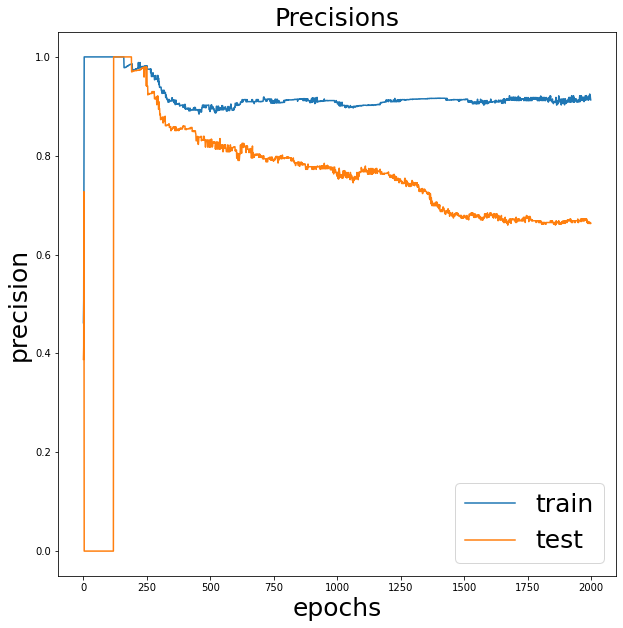

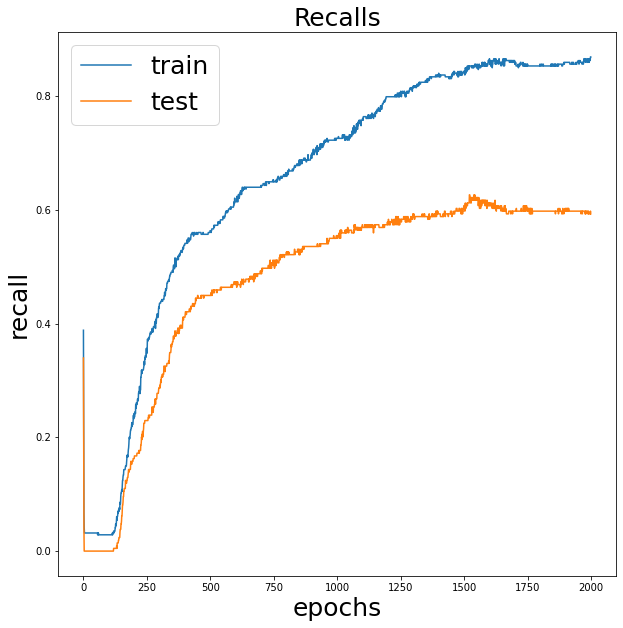

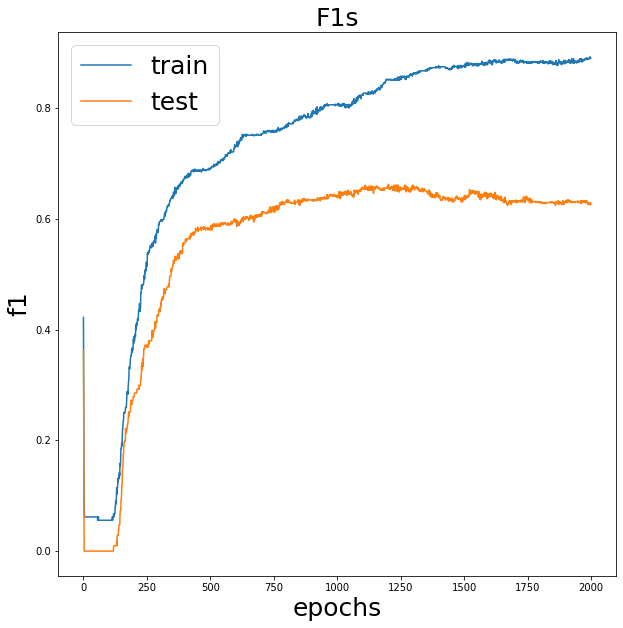

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 500,
    'name': 'Gpositive',
    'seed': 2,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

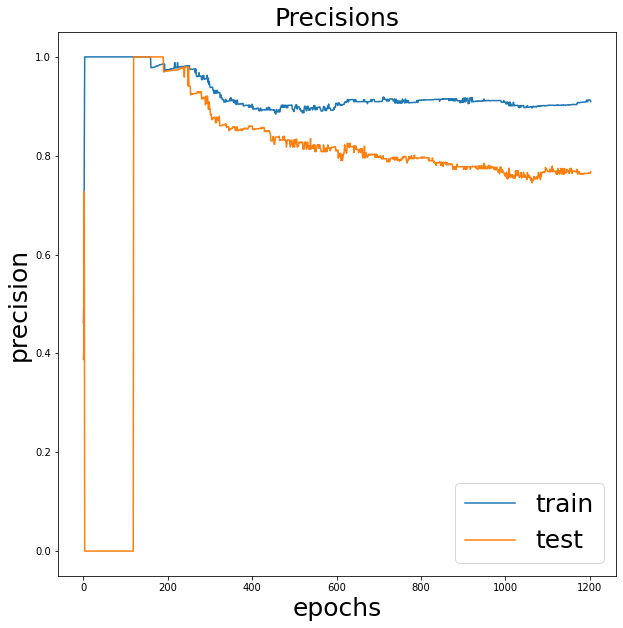

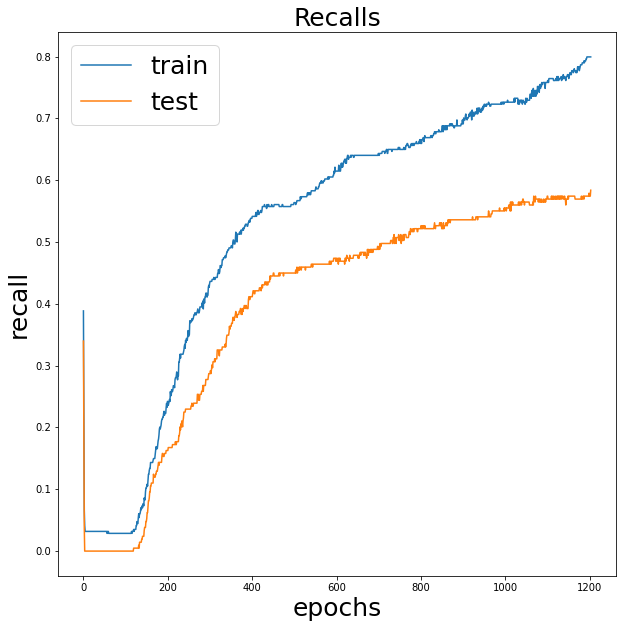

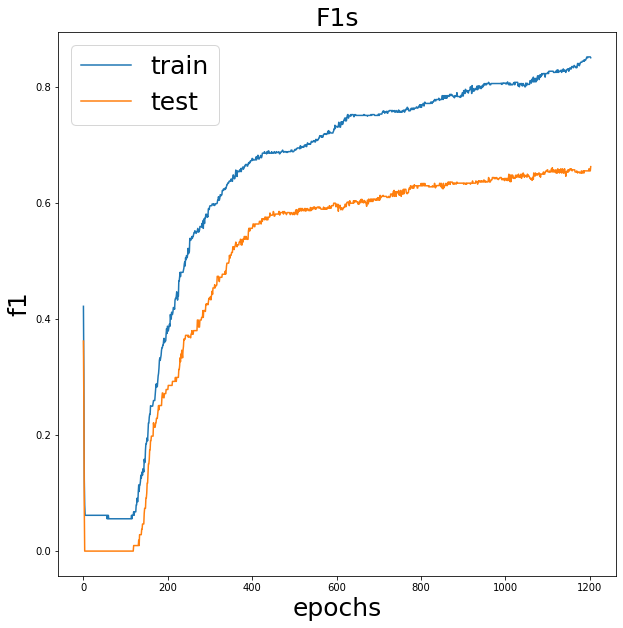

Model was trained on 4 classes
Evaluating Model on train mode
Classwise Results
|                     |         0 |         1 |         2 |        3 |
|:--------------------|----------:|----------:|----------:|---------:|
| class               | 1         | 2         | 3         | 4        |
| accuracy            | 0.913183  | 0.971061  | 0.92926   | 0.903537 |
| hamming loss        | 0.0868167 | 0.0289389 | 0.0707395 | 0.096463 |
| zero_one_loss       | 0.0868167 | 0.0289389 | 0.0707395 | 0.096463 |
| micro av. jaccard   | 0.840237  | 0.94375   | 0.867868  | 0.824047 |
| macro av. jaccard   | 0.814452  | 0.576346  | 0.864434  | 0.759158 |
| micro av. precision | 0.913183  | 0.971061  | 0.92926   | 0.903537 |
| macro av. precision | 0.933306  | 0.985437  | 0.923946  | 0.889509 |
| micro av. recall    | 0.913183  | 0.971061  | 0.92926   | 0.903537 |
| macro av. recall    | 0.874977  | 0.590909  | 0.931677  | 0.834474 |
| micro av. f1        | 0.913183  | 0.971061  | 0.92926   | 0.903537

In [3]:
hparams_dict = {
    'inputs': 300,
    'outputs': 4,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 500,
    'name': 'Gpositive',
    'seed': 2,
    'ckpt_dir': './checkpoints/gpositive',
    'load_from_file': './checkpoints/gpositive/best_f1_model0.0005_2000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()